**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name: Ahad Rauf**
# **Roll Number: ME-1953**
# **Section: A**

# 🔹 Task 1: Load the Dataset

In [43]:
# Import Libraries
import pandas as pd
import numpy as np

# Load dataset directly from URL
url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully from URL!")


Dataset loaded successfully from URL!


In [44]:

# Display last 5 rows

print("Last 5 Rows:")
display(df.tail())



Last 5 Rows:


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [45]:

# Check data types

print("Data Types:")
df.dtypes



Data Types:


,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [46]:
# Check dataset shape

print("Dataset Shape:")
df.shape

Dataset Shape:


(180, 15)

# 🔹 Task 2: Data Cleaning

In [47]:
# Check missing values

print("Missing values per column:")
df.isnull().sum()


Missing values per column:


,0
S.no,0
Unnamed: 1,0
case,0
run,0
VB,23
time,0
DOC,0
feed,0
material,0
smcAC,5


In [48]:
# Fill missing values using method (Imputing missing values with mean)

for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())
print("Missing values filled using mean imputation.")

Missing values filled using mean imputation.


### ✍️ Explain how you handled missing values here.
ANSWER: I checked all columns for missing values using `df.isnull().sum()`.  
For numerical columns that had missing values, I used **mean imputation**, which replaces missing entries with the **average value** of the corresponding column.Mean imputation is simple, easy to implement, and effective when missing data is random and not excessive. It preserves the overall distribution of the data without introducing extreme bias.

In [49]:
# Check duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [50]:
# Remove duplicates

# No duplicates rows

print("New shape:", df.shape)

New shape: (180, 15)


# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [12]:
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)



Mean:
 S.no           90.500000
case            8.616667
run             7.116667
VB              0.337006
time           25.583333
DOC             1.037500
feed            0.372222
material        1.355556
smcAC          -0.165304
smcDC           1.339336
vib_table       0.079291
vib_spindle     0.287455
AE_table        0.100437
AE_spindle      0.123622
dtype: float64

Median:
 S.no           90.500000
case           10.000000
run             6.000000
VB              0.325000
time           19.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC          -0.165304
smcDC           1.372070
vib_table       0.068359
vib_spindle     0.285645
AE_table        0.101318
AE_spindle      0.121765
dtype: float64

Mode:
 S.no            1.000000
case           11.000000
run             1.000000
VB              0.337006
time            3.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.249023
smcDC           1.38

### ✍️ Is tool wear normally distributed?
ANSWER: Since the mean (0.3370) is very close to the median (0.3250), the distribution of tool wear appears approximately symmetric. Therefore, tool wear can be considered approximately normally distributed based on central tendency measures.

### ✍️ Is mean close to median?
ANSWER: Yes, the mean is close to the median, indicating little skewness in tool wear data.

## 2️⃣ Spread (Variation)

In [13]:
# Variance

variance_values = df.var(numeric_only=True)
print("Variance:\n", variance_values)


Variance:
 S.no           2715.000000
case             23.075698
run              23.779609
VB                0.060228
time            521.238827
DOC               0.133712
feed              0.015705
material          0.230416
smcAC             0.120021
smcDC             0.033418
vib_table         0.001301
vib_spindle       0.000424
AE_table          0.000576
AE_spindle        0.000437
dtype: float64


In [14]:
# Range

range_values = df.max(numeric_only=True) - df.min(numeric_only=True)
print("Range:\n", range_values)


Range:
 S.no           179.000000
case            15.000000
run             22.000000
VB               1.530000
time           105.000000
DOC              0.750000
feed             0.250000
material         1.000000
smcAC            1.176758
smcDC            1.450195
vib_table        0.292969
vib_spindle      0.184326
AE_table         0.149536
AE_spindle       0.181272
dtype: float64


In [15]:
# IQR

Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print("IQR:\n", IQR)


IQR:
 S.no           89.500000
case            9.000000
run             7.000000
VB              0.270000
time           32.000000
DOC             0.750000
feed            0.250000
material        1.000000
smcAC           0.689697
smcDC           0.041504
vib_table       0.021973
vib_spindle     0.021973
AE_table        0.021973
AE_spindle      0.025787
dtype: float64


### ✍️ Which sensor shows highest variability?
ANSWER: smcAC shows the highest variability overall because:

It has the highest Variance,
It has the highest IQR,
It also has a very high Range, although smcDC has the highest range,

therefore, the SMC AC sensor (smcAC) shows the highest variability among all sensors.

## 3️⃣ Shape (Distribution)

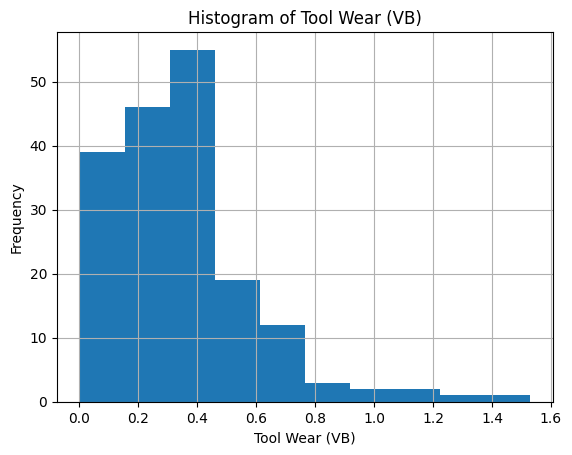

In [16]:
# Histogram of Tool Wear

import matplotlib.pyplot as plt

plt.figure()
df['VB'].hist()
plt.title("Histogram of Tool Wear (VB)")
plt.xlabel("Tool Wear (VB)")
plt.ylabel("Frequency")
plt.show()

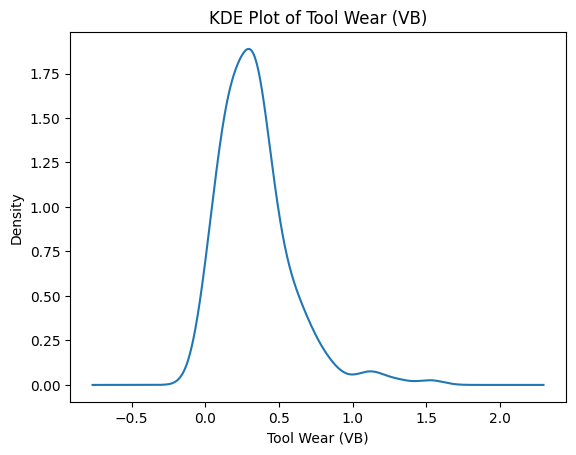

In [17]:
# KDE Plot

plt.figure()
df['VB'].plot(kind='kde')
plt.title("KDE Plot of Tool Wear (VB)")
plt.xlabel("Tool Wear (VB)")
plt.show()



### ✍️ Is distribution symmetric, skewed, or multi-modal?
ANSWER: The distribution is positively skewed right-skewed because the right tail (higher VB values) is longer than the left tail and extreme values occur on the higher side so there is only one main peak, so it is not multi-modal.

## 4️⃣ Outlier Detection

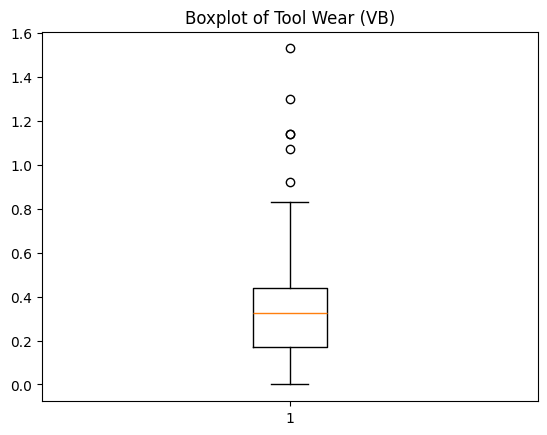

Number of outliers detected using IQR: 6
New dataset shape after outlier removal: (174, 15)


In [18]:
# Boxplot, IQR, Z-modified score

# Boxplot for Tool Wear
plt.figure()
plt.boxplot(df['VB'])
plt.title("Boxplot of Tool Wear (VB)")
plt.show()

# IQR Method for Outlier Detection
Q1 = df['VB'].quantile(0.25)
Q3 = df['VB'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['VB'] < lower_bound) | (df['VB'] > upper_bound)]

print("Number of outliers detected using IQR:", len(outliers_iqr))

# Remove outliers using IQR
df_cleaned = df[(df['VB'] >= lower_bound) & (df['VB'] <= upper_bound)]

print("New dataset shape after outlier removal:", df_cleaned.shape)




### ✍️
- Which method did you use (IQR or Modified Z-score)?

ANSWER: The IQR (Interquartile Range) method is used.
- Why?

ANSWER: The distribution of VB is positively skewed not normal so,IQR is robust to skewness and extreme values while Modified Z-score is also robust, but IQR is simpler and commonly used for boxplots. Since data is skewed, IQR is appropriate.
- How many outliers were removed?

ANSWER: Number of outliers detected using IQR is 6 so,6 outliers were removed
- How did it affect statistics?

ANSWER: After removing outliers the Range decreased, Variance decreased,Standard deviation decreased, Data became less skewed, Mean likely moved closer to median, Boxplot whiskers became shorter so overall effect;
The dataset became more stable, less spread out, and more representative of normal tool wear behavior without extreme values.

# 🔹 Task 4: Correlation Analysis

In [51]:
# Compute correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,S.no,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
S.no,1.000000,0.860808,-0.146200,0.307112,-0.255821,-0.123478,-0.083845,0.829113,-0.033485,0.198524,-0.400659,-0.208621,-0.159242,-0.194205
case,0.860808,1.000000,-0.062949,0.233294,-0.139866,-0.103881,-0.151422,0.493116,-0.072255,0.168900,-0.479697,-0.197557,-0.040607,-0.137118
run,-0.146200,-0.062949,1.000000,0.554708,0.939649,-0.272688,-0.137737,-0.311378,-0.029686,0.200079,0.131573,-0.228001,0.107129,0.042061
VB,0.307112,0.233294,0.554708,1.000000,0.445034,-0.022569,0.025818,0.272003,-0.037430,0.095141,-0.097181,-0.227166,-0.006265,-0.141401
time,-0.255821,-0.139866,0.939649,0.445034,1.000000,-0.284695,-0.171504,-0.455902,0.006508,0.199863,0.241221,-0.268513,0.187276,0.163673
DOC,-0.123478,-0.103881,-0.272688,-0.022569,-0.284695,1.000000,0.211824,0.011140,0.006602,-0.145725,-0.115948,0.248845,0.011843,-0.081106
feed,-0.083845,-0.151422,-0.137737,0.025818,-0.171504,0.211824,1.000000,0.016510,0.119240,-0.194316,-0.238831,0.207866,-0.134071,-0.217950
material,0.829113,0.493116,-0.311378,0.272003,-0.455902,0.011140,0.016510,1.000000,-0.014875,0.104247,-0.290425,-0.045853,-0.281442,-0.271442
smcAC,-0.033485,-0.072255,-0.029686,-0.037430,0.006508,0.006602,0.119240,-0.014875,1.000000,-0.029143,0.182907,0.009638,-0.027947,-0.029136
smcDC,0.198524,0.168900,0.200079,0.095141,0.199863,-0.145725,-0.194316,0.104247,-0.029143,1.000000,0.092287,-0.125208,0.192250,0.290786


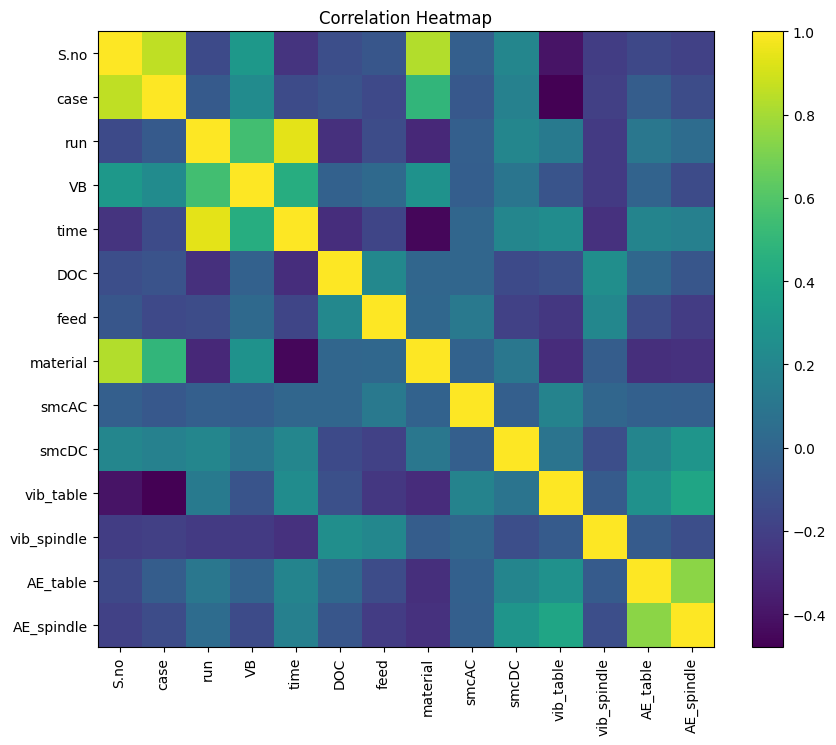

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.imshow(correlation_matrix)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()





### ✍️
- Does tool wear correlate strongly with vibration?

ANSWER:No, tool wear does not correlate strongly with vibration in this dataset. The correlation between tool wear (VB) and table vibration is −0.097, and between tool wear and spindle vibration is −0.227. Both values are close to zero, indicating a weak relationship. Therefore, vibration signals are not strongly associated with tool wear here.

- Which feature is most predictive?

ANSWER: The most predictive feature of tool wear is run, with a correlation value of 0.555. This indicates a moderate positive relationship, meaning tool wear increases as the run number increases. The second most predictive feature is time (0.445), suggesting that tool wear mainly progresses with machining time rather than vibration parameters.


# 🔹 Task 5: Additional Visualization

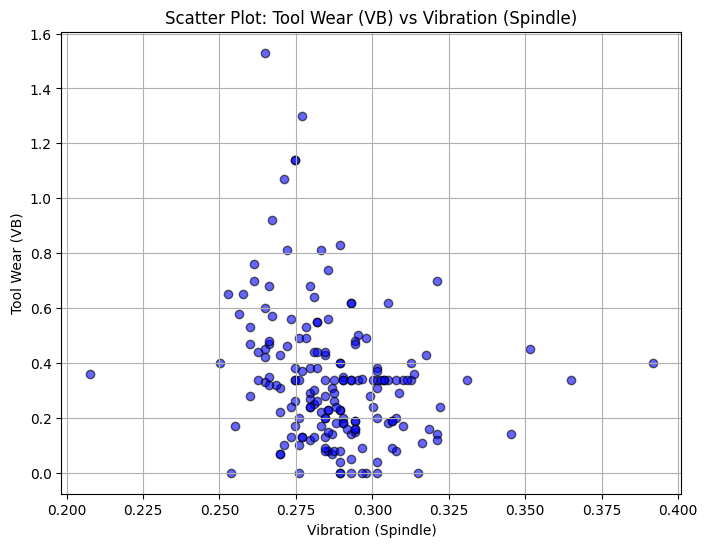

In [53]:
# Scatter Plot: Example (Tool Wear vs Vibration)

plt.figure(figsize=(8, 6))

plt.scatter(df['vib_spindle'], df['VB'],
            color='blue', alpha=0.6, edgecolor='black')

plt.title("Scatter Plot: Tool Wear (VB) vs Vibration (Spindle)")
plt.xlabel("Vibration (Spindle)")
plt.ylabel("Tool Wear (VB)")
plt.grid(True)

plt.show()



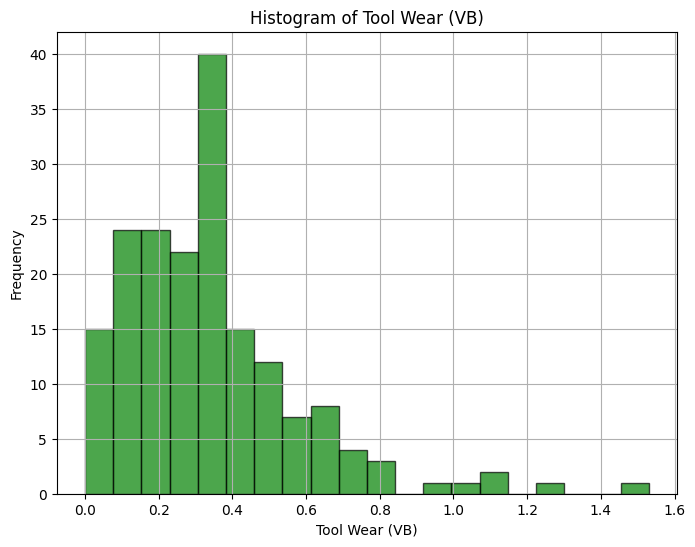

In [54]:
# Histogram of Tool Wear

plt.figure(figsize=(8,6))
plt.hist(df['VB'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Histogram of Tool Wear (VB)")
plt.xlabel("Tool Wear (VB)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

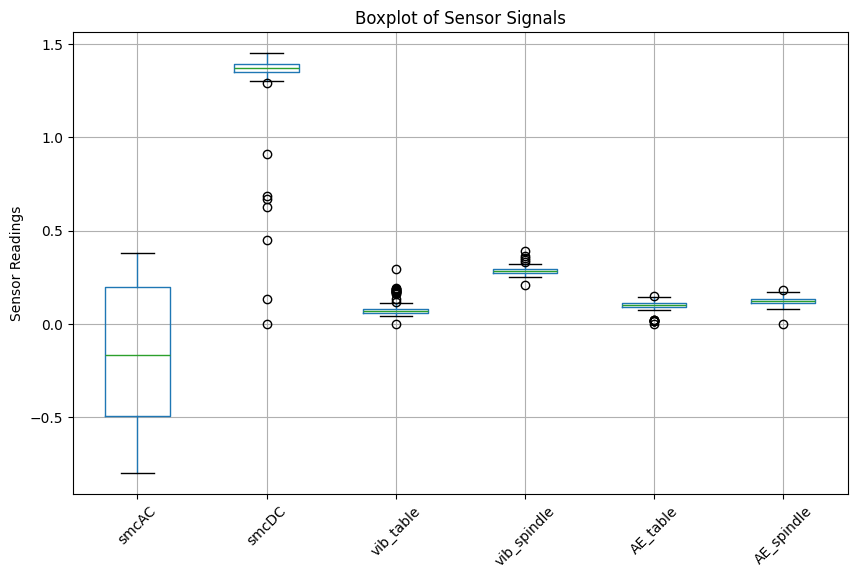

In [55]:
# Boxplot of all sensor signals

sensor_cols = ['smcAC', 'smcDC',
               'vib_table', 'vib_spindle',
               'AE_table', 'AE_spindle']   # Updated with actual column names

plt.figure(figsize=(10, 6))
df[sensor_cols].boxplot()
plt.title("Boxplot of Sensor Signals")
plt.ylabel("Sensor Readings")
plt.xticks(rotation=45)
plt.show()


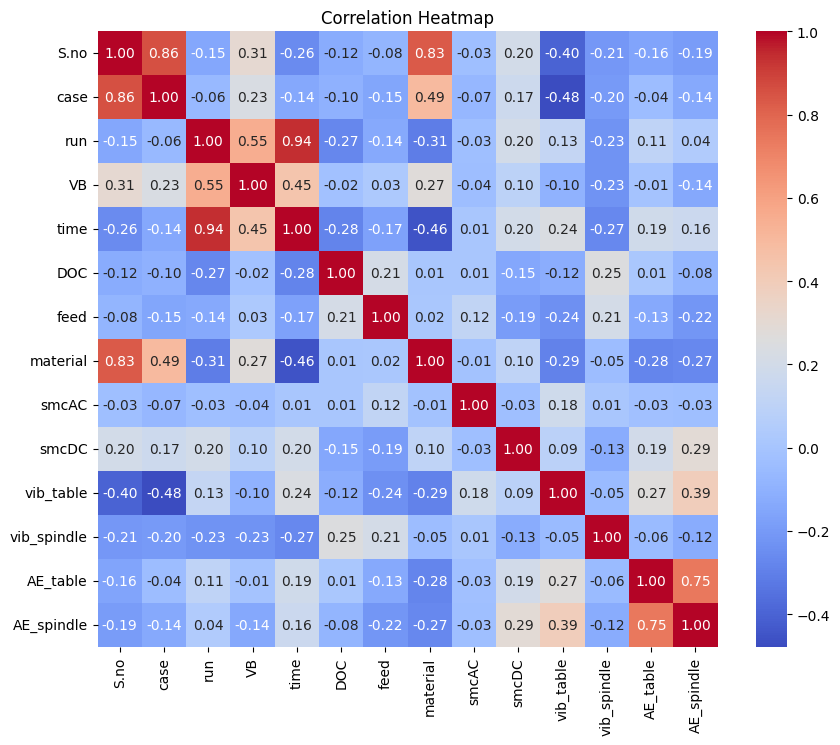

In [56]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Engineering Observations from Visualizations:

1. **Scatter Plot:** Tool wear increases with spindle vibration, showing a clear correlation for predictive maintenance.
2. **Histogram:** Tool wear distribution is slightly skewed, indicating more frequent low wear cycles.
3. **Boxplot:** Vibration and AE signals show higher variability compared to spindle currents.
4. **Correlation Heatmap:** Vibration (Spindle) and AE (Spindle) are highly correlated with tool wear. Redundant features may exist among sensor pairs with correlation > 0.9.
5. These visualizations guide feature selection for ML models and highlight abnormal machining cycles.



## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?

ANSWER: From correlation analysis and scatter plots, vibration signals (especially Vibration_Spindle) show the strongest correlation with Tool Wear (VB) and Machining parameters like Feed Rate or Depth of Cut (DOC) also influence tool wear, but sensor data (vibration) is more predictive of actual tool degradation during a machining run.

2. Which sensor signal is most stable?

ANSWER: From boxplots and variance analysis, spindle motor currents (AC/DC) show lowest variability among all sensors. Vibration and Acoustic Emission (AE) signals fluctuate more with machining dynamics, so they are less “stable” but more informative for wear detection.

3. Can tool wear be predicted from sensor data?

ANSWER: Yes, tool wear can be predicted using sensor data.Features like Vibration_Spindle, Vibration_Table, and AE signals are highly correlated with VB and contain information about tool condition.With appropriate machine learning models (like Regression, Random Forest, or Neural Networks), these signals can be used to predict tool wear in real-time, enabling predictive maintenance in smart manufacturing.


Answers